## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [19]:
import os
import keras
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.3)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


In [20]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [21]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [22]:
def build_mlp():
        input_layer = keras.layers.Input([x_train.shape[-1]])
        x = keras.layers.Dense(units=512, activation="relu")(input_layer)
        x = keras.layers.Dense(units=256, activation="relu")(x)
        x = keras.layers.Dense(units=128, activation="relu")(x)
        out = keras.layers.Dense(units=10, activation="softmax")(x)
        model = keras.models.Model(inputs=[input_layer], outputs=[out])
        return model
model = build_mlp()

In [23]:

model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_17 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_18 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_19 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [24]:

model.fit(x_train, y_train, 
          epochs= 100, 
          batch_size=1000, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 89us/step - loss: 2.3256 - acc: 0.1104 - val_loss: 2.2982 - val_acc: 0.1147
Epoch 2/100
50000/50000 [==============================] - 4s 82us/step - loss: 2.2820 - acc: 0.1297 - val_loss: 2.2698 - val_acc: 0.1375
Epoch 3/100
50000/50000 [==============================] - 4s 83us/step - loss: 2.2589 - acc: 0.1527 - val_loss: 2.2494 - val_acc: 0.1618
Epoch 4/100
50000/50000 [==============================] - 4s 83us/step - loss: 2.2398 - acc: 0.1761 - val_loss: 2.2313 - val_acc: 0.1846
Epoch 5/100
50000/50000 [==============================] - 4s 83us/step - loss: 2.2221 - acc: 0.1951 - val_loss: 2.2143 - val_acc: 0.1993
Epoch 6/100
50000/50000 [==============================] - 4s 85us/step - loss: 2.2053 - acc: 0.2081 - val_loss: 2.1979 - val_acc: 0.2096
Epoch 7/100
50000/50000 [==============================] - 4s 85us/step - loss: 2.1893 - acc: 0.2173 - val_loss: 2.1824 - 

50000/50000 [==============================] - 5s 103us/step - loss: 1.8609 - acc: 0.3545 - val_loss: 1.8600 - val_acc: 0.3569
Epoch 60/100
50000/50000 [==============================] - 5s 103us/step - loss: 1.8584 - acc: 0.3545 - val_loss: 1.8576 - val_acc: 0.3592
Epoch 61/100
50000/50000 [==============================] - 5s 102us/step - loss: 1.8559 - acc: 0.3558 - val_loss: 1.8551 - val_acc: 0.3599
Epoch 62/100
50000/50000 [==============================] - 6s 121us/step - loss: 1.8535 - acc: 0.3563 - val_loss: 1.8528 - val_acc: 0.3591
Epoch 63/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.8511 - acc: 0.3576 - val_loss: 1.8504 - val_acc: 0.3603
Epoch 64/100
50000/50000 [==============================] - 8s 152us/step - loss: 1.8488 - acc: 0.3584 - val_loss: 1.8480 - val_acc: 0.3612
Epoch 65/100
50000/50000 [==============================] - 7s 144us/step - loss: 1.8465 - acc: 0.3581 - val_loss: 1.8457 - val_acc: 0.3630
Epoch 66/100
50000/50000 [=======

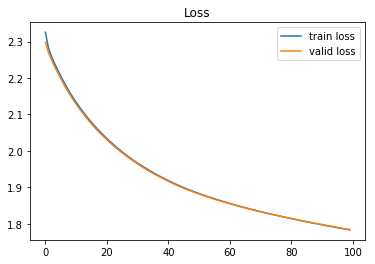

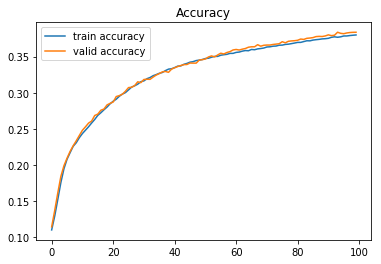

In [26]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()